In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers_df=pd.read_csv("Customers.csv")
products_df=pd.read_csv("Products.csv")
transactions_df=pd.read_csv("Transactions.csv")

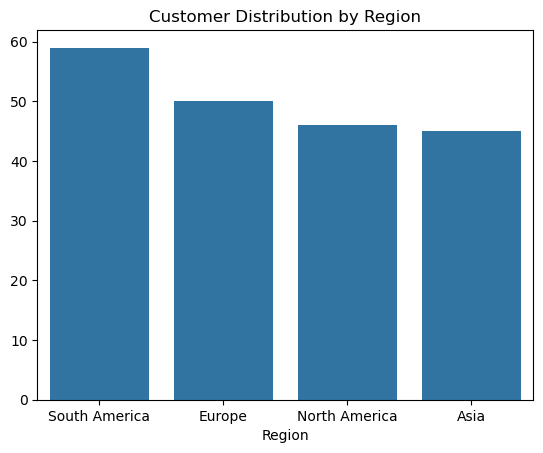

In [3]:
region_counts = customers_df["Region"].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.show()


In [4]:

merged_data = transactions_df.merge(customers_df, on="CustomerID")

region_sales = merged_data.groupby("Region")["TotalValue"].sum().reset_index()

print(region_sales)


          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


C:\Users\91932\AppData\Local\Temp\ipykernel_11092\1580953000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales["Region"], y=region_sales["TotalValue"], palette="viridis")


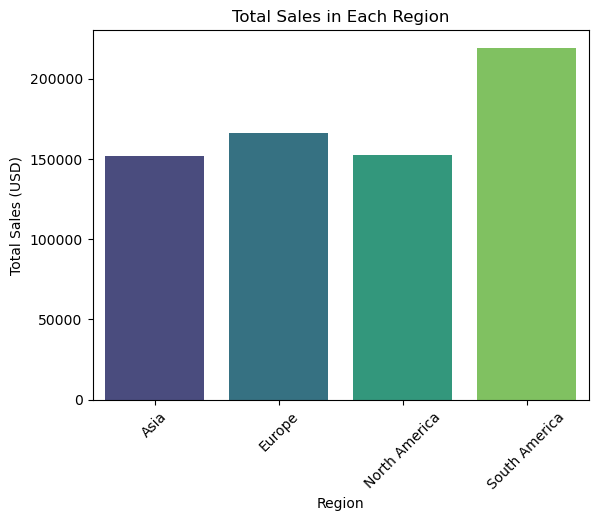

In [5]:
sns.barplot(x=region_sales["Region"], y=region_sales["TotalValue"], palette="viridis")
plt.title("Total Sales in Each Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


In [6]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

customers_df["SignupYearMonth"] = customers_df["SignupDate"].dt.to_period("M")

signup_trends = customers_df["SignupYearMonth"].value_counts().sort_index()


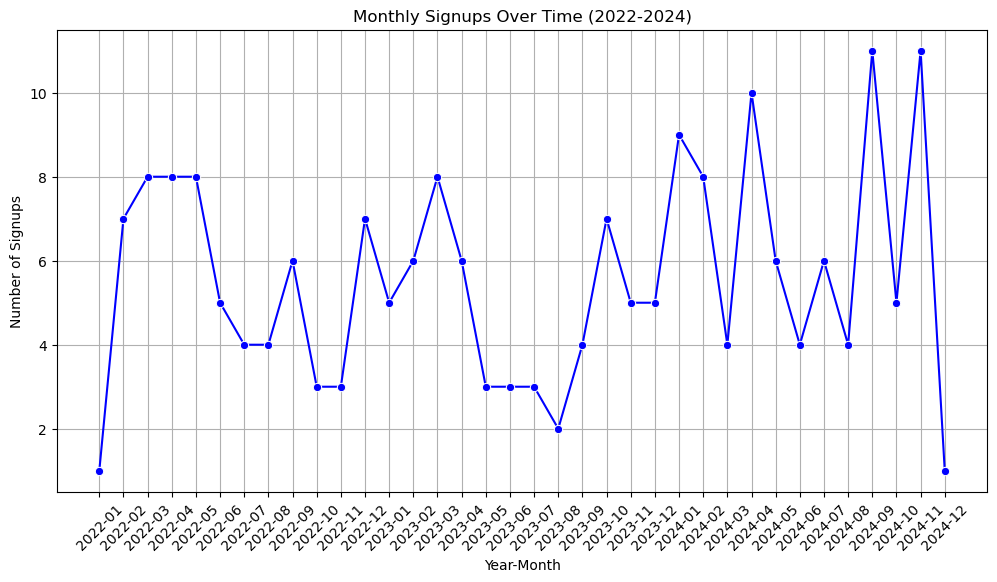

In [7]:
signup_trends.index = signup_trends.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.title("Monthly Signups Over Time (2022-2024)")
plt.grid(True)
plt.show()


In [9]:
category_counts = products_df.groupby('Category')['ProductID'].count()

print(category_counts)


Category
Books          26
Clothing       25
Electronics    26
Home Decor     23
Name: ProductID, dtype: int64


In [10]:
merged_data = transactions_df.merge(products_df, on="ProductID")

product_sales = merged_data.groupby(["ProductID", "Category"])["Quantity"].sum().reset_index()

top_products = product_sales.nlargest(10, "Quantity")

print(top_products)


   ProductID     Category  Quantity
53      P054        Books        46
58      P059     Clothing        46
28      P029  Electronics        45
47      P048        Books        43
56      P057  Electronics        43
60      P061   Home Decor        43
78      P079   Home Decor        43
61      P062        Books        39
19      P020     Clothing        38
21      P022   Home Decor        38


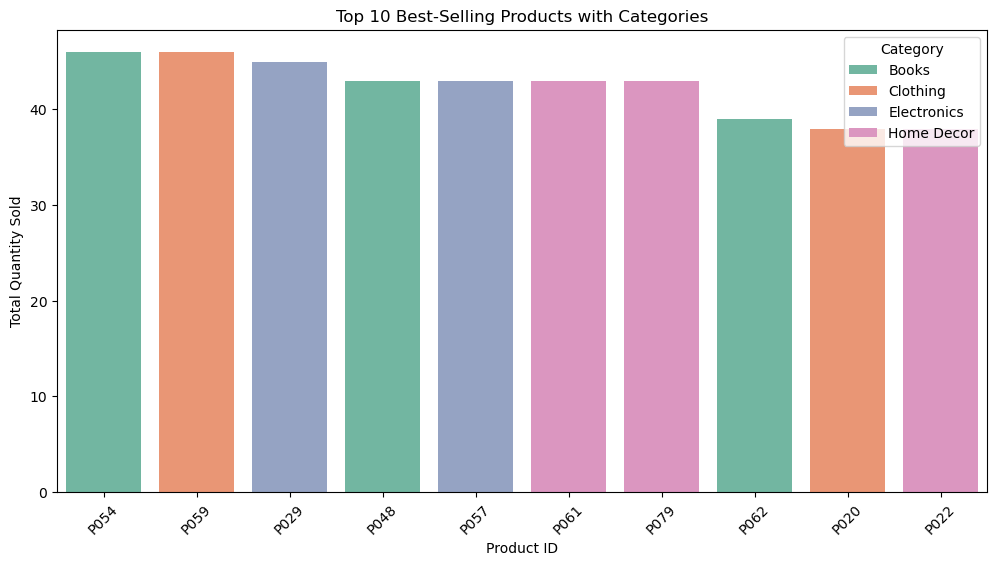

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products["ProductID"], y=top_products["Quantity"], hue=top_products["Category"], palette="Set2")
plt.title("Top 10 Best-Selling Products with Categories")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


In [12]:
merged_data = transactions_df.merge(products_df, on="ProductID")

customers_per_category = merged_data.groupby("Category")["CustomerID"].nunique().reset_index()

customers_per_category.columns = ["Category", "UniqueCustomers"]

print(customers_per_category)


      Category  UniqueCustomers
0        Books              154
1     Clothing              135
2  Electronics              140
3   Home Decor              138


In [13]:
category_sales = merged_data.groupby("Category")["Quantity"].sum().reset_index()

category_sales = category_sales.sort_values(by="Quantity", ascending=False)

print(category_sales)


      Category  Quantity
0        Books       681
3   Home Decor       639
2  Electronics       627
1     Clothing       590


In [14]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

transactions_df["YearMonth"] = transactions_df["TransactionDate"].dt.to_period("M")
merged_data = transactions_df.merge(products_df, on="ProductID")

category_trends = merged_data.groupby(["YearMonth", "Category"])["Quantity"].sum().reset_index()




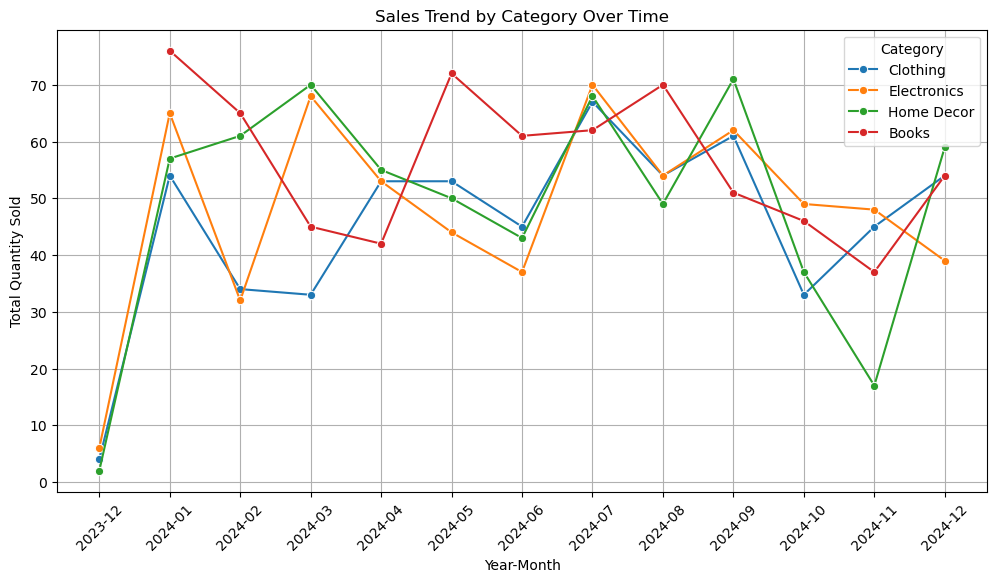

In [15]:
plt.figure(figsize=(12, 6))

category_trends["YearMonth"] = category_trends["YearMonth"].astype(str)

sns.lineplot(data=category_trends, x="YearMonth", y="Quantity", hue="Category", marker="o", palette="tab10")

plt.title("Sales Trend by Category Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()

In [16]:
customer_purchase_counts = transactions_df["CustomerID"].value_counts()
repeat_customers = (customer_purchase_counts > 1).mean()
print(f"Percentage of Repeat Customers: {repeat_customers * 100:.2f}%")


Percentage of Repeat Customers: 93.97%


In [17]:
one_time_customers = customer_purchase_counts[customer_purchase_counts == 1].index
one_time_transactions = transactions_df[transactions_df["CustomerID"].isin(one_time_customers)]

one_time_transactions = one_time_transactions.merge(products_df, on="ProductID")

one_time_transactions = one_time_transactions[["CustomerID", "Category", "TransactionDate"]]

one_time_transactions["TransactionDate"] = pd.to_datetime(one_time_transactions["TransactionDate"])

one_time_transactions = one_time_transactions.sort_values(by="TransactionDate")

print(one_time_transactions.head())
print(len(one_time_transactions))

   CustomerID     Category     TransactionDate
11      C0110   Home Decor 2024-01-02 19:11:34
2       C0014   Home Decor 2024-01-17 18:31:55
7       C0020  Electronics 2024-01-30 00:57:29
8       C0058     Clothing 2024-02-01 14:24:48
5       C0080   Home Decor 2024-03-12 15:48:24
12


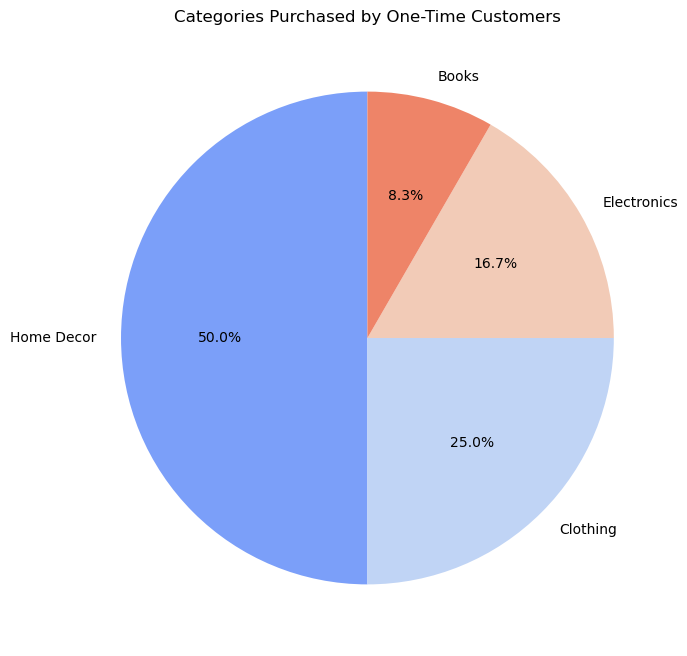

In [103]:
category_counts = one_time_transactions["Category"].value_counts()
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(category_counts)), startangle=90, legend=False)
plt.title("Categories Purchased by One-Time Customers")
plt.ylabel('')  # Hide the y-label for better visual
plt.show()

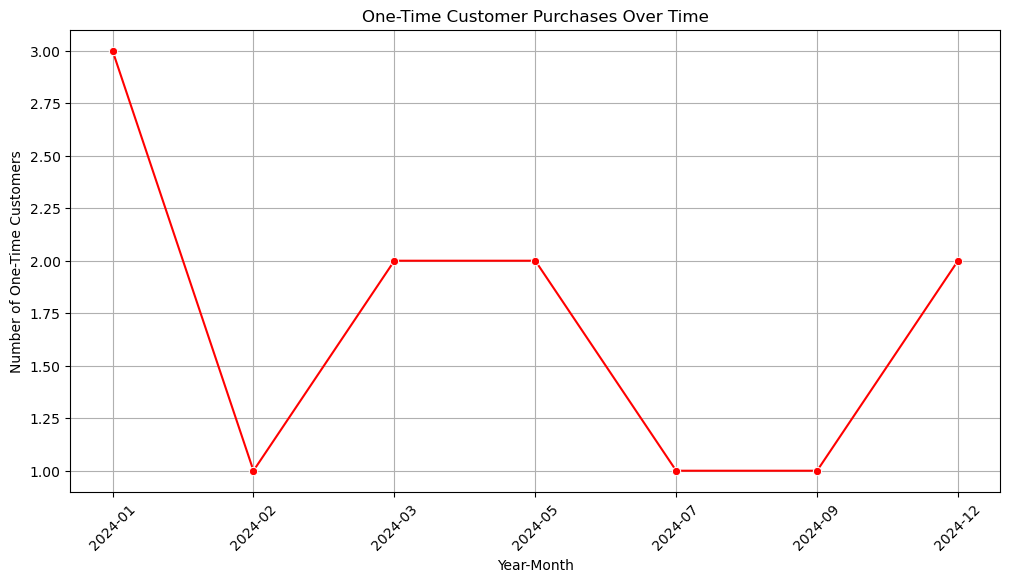

In [19]:
one_time_transactions["YearMonth"] = one_time_transactions["TransactionDate"].dt.to_period("M")

one_time_trend = one_time_transactions.groupby("YearMonth").size().reset_index(name="OneTimePurchases")

one_time_trend["YearMonth"] = one_time_trend["YearMonth"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="OneTimePurchases", data=one_time_trend, marker="o", color="r")
plt.title("One-Time Customer Purchases Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of One-Time Customers")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [49]:
aov = transactions_df.groupby("CustomerID")["TotalValue"].mean().reset_index()

aov.columns = ["CustomerID", "AOV"]

aov_customers = aov.merge(customers_df[["CustomerID", "Region"]], on="CustomerID")


In [51]:
aov_customers = aov_customers.sort_values(by=["Region", "AOV"], ascending=[True, False])

top_customers_by_region = aov_customers.groupby("Region").head(5)

print(top_customers_by_region)


    CustomerID          AOV         Region
39       C0040  1323.133333           Asia
137      C0138  1122.050000           Asia
114      C0115  1045.726667           Asia
79       C0080  1007.520000           Asia
53       C0054  1005.048750           Asia
88       C0089  1278.110000         Europe
65       C0066  1266.426667         Europe
194      C0196  1245.720000         Europe
113      C0114  1156.086000         Europe
43       C0044  1076.703333         Europe
183      C0185  1141.440000  North America
78       C0079  1062.890000  North America
49       C0050  1022.943333  North America
116      C0117  1007.067500  North America
17       C0018   956.370000  North America
167      C0168  1263.457500  South America
95       C0096  1214.584000  South America
147      C0148  1091.558000  South America
81       C0082  1081.844286  South America
5        C0006  1056.892500  South America


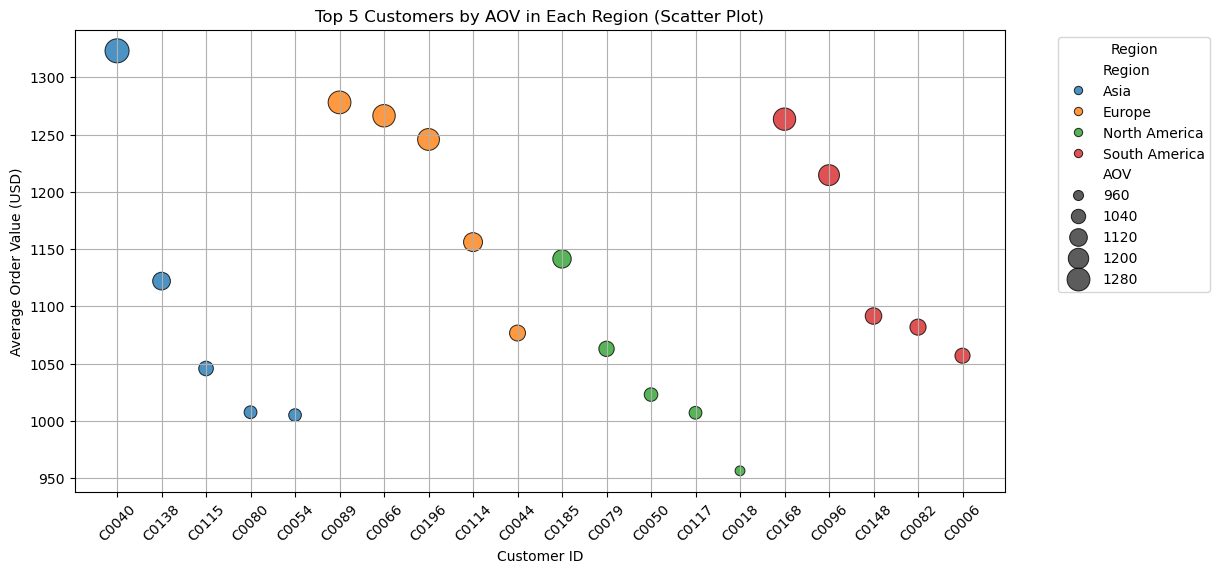

In [53]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=top_customers_by_region["CustomerID"], y=top_customers_by_region["AOV"], hue=top_customers_by_region["Region"], size=top_customers_by_region["AOV"], sizes=(50, 300), palette="tab10", edgecolor="black", alpha=0.8)

plt.title("Top 5 Customers by AOV in Each Region (Scatter Plot)")
plt.xlabel("Customer ID")
plt.ylabel("Average Order Value (USD)")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


C:\Users\91932\AppData\Local\Temp\ipykernel_11092\2467905729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=top_customers_by_region["Region"], y=top_customers_by_region["AOV"], palette="coolwarm")


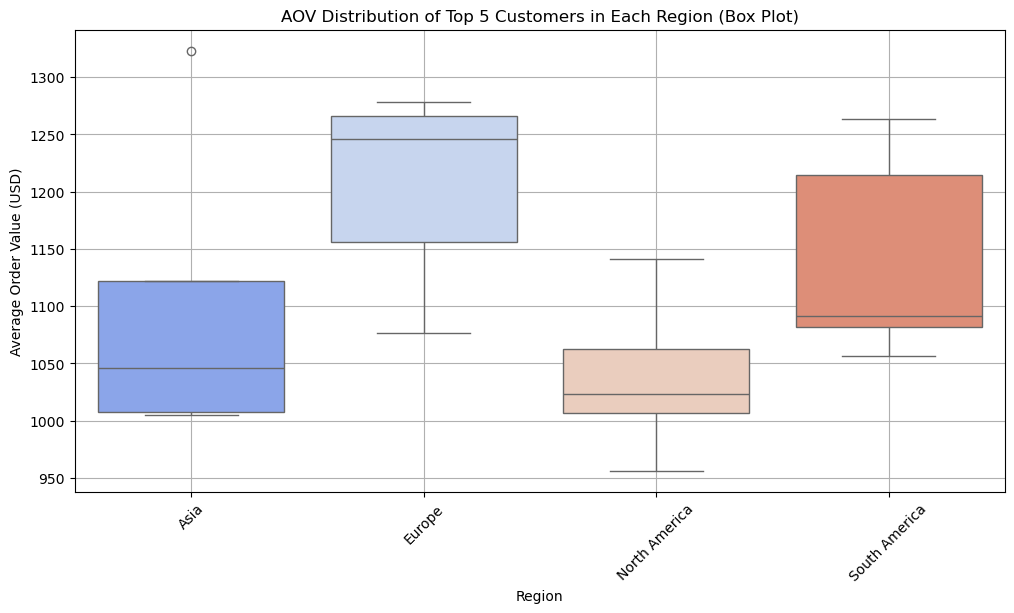

In [55]:
plt.figure(figsize=(12, 6))

sns.boxplot(x=top_customers_by_region["Region"], y=top_customers_by_region["AOV"], palette="coolwarm")

plt.title("AOV Distribution of Top 5 Customers in Each Region (Box Plot)")
plt.xlabel("Region")
plt.ylabel("Average Order Value (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


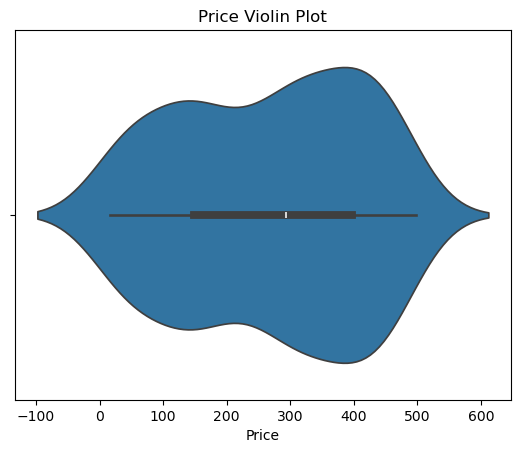

In [79]:
sns.violinplot(x=products_df["Price"])
plt.title("Price Violin Plot")
plt.show()

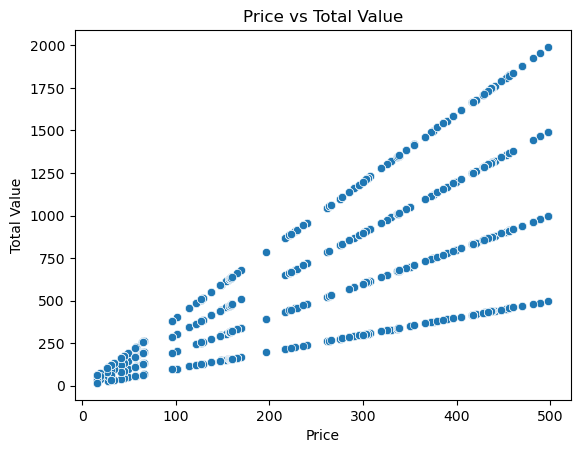

In [83]:
sns.scatterplot(x="Price", y="TotalValue", data=transactions_df)
plt.title("Price vs Total Value")
plt.xlabel("Price")
plt.ylabel("Total Value")
plt.show()


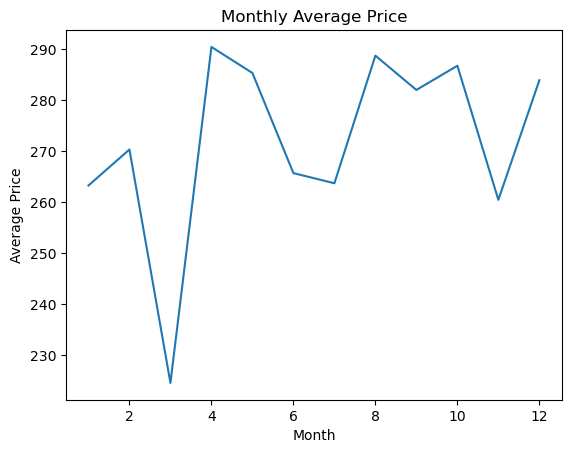

In [95]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])  # if not already datetime
transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
monthly_avg_price =  transactions_df.groupby("Month")["Price"].mean()

plt.plot(monthly_avg_price)
plt.title("Monthly Average Price")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()


In [101]:
avg_price_by_category = products_df.groupby("Category")["Price"].mean()
print(avg_price_by_category)

Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64
